In [1]:
from torchvision import models
import torch
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from PIL import Image 

In [133]:
# import requests
# requests.packages.urllib3.disable_warnings()
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     # Legacy Python that doesn't verify HTTPS certificates by default
#     pass
# else:
# # Handle target environment that doesn't support HTTPS verification
#     ssl._create_default_https_context = _create_unverified_https_context

In [134]:
trainset = torchvision.datasets.CIFAR10(root=r"C:\Users\andre\OneDrive\Research2\data",
                                         train=True,
                                         download=False)

In [7]:
trainset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [8]:
trainset.data.shape

(50000, 32, 32, 3)

Text(0.5, 1.0, 'truck')

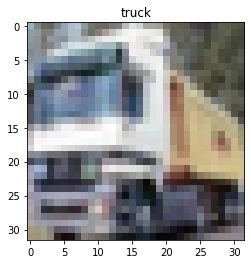

In [13]:
Nimg = 1
plt.imshow(trainset.data[Nimg])
plt.title(trainset.classes[trainset.targets[Nimg]])

## Convolutional Layers Pytorch

In [39]:
ConvLayer1 = torch.nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = (5,5), stride = 3)

In [40]:
Output1 = ConvLayer1(torch.tensor(trainset.data[:10]).reshape(10, 3, 32, 32).float())

In [41]:
Output1.shape

torch.Size([10, 16, 10, 10])

In [42]:
ConvLayer1.weight.shape

torch.Size([16, 3, 5, 5])

In [43]:
MaxL = torch.nn.MaxPool2d(kernel_size = (1,1))

In [44]:
Outputm = MaxL(Output1)

In [45]:
Outputm.shape 

torch.Size([10, 16, 10, 10])

In [49]:
ConvTLayer1 = torch.nn.ConvTranspose2d(in_channels = 16, out_channels = 3, kernel_size = (15,15))

In [50]:
Rec = ConvTLayer1(Outputm)

In [51]:
Rec.shape

torch.Size([10, 3, 24, 24])

## Pretrained Models (Resnet)

In [54]:
from torchvision import models
from torchvision import transforms

In [171]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

In [66]:
model = models.resnet18(pretrained = True)

In [173]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [174]:
with open('image_classes.txt') as f:
  imagenet_labels = [line.strip() for line in f.readlines()]

In [175]:
imagenet_labels

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

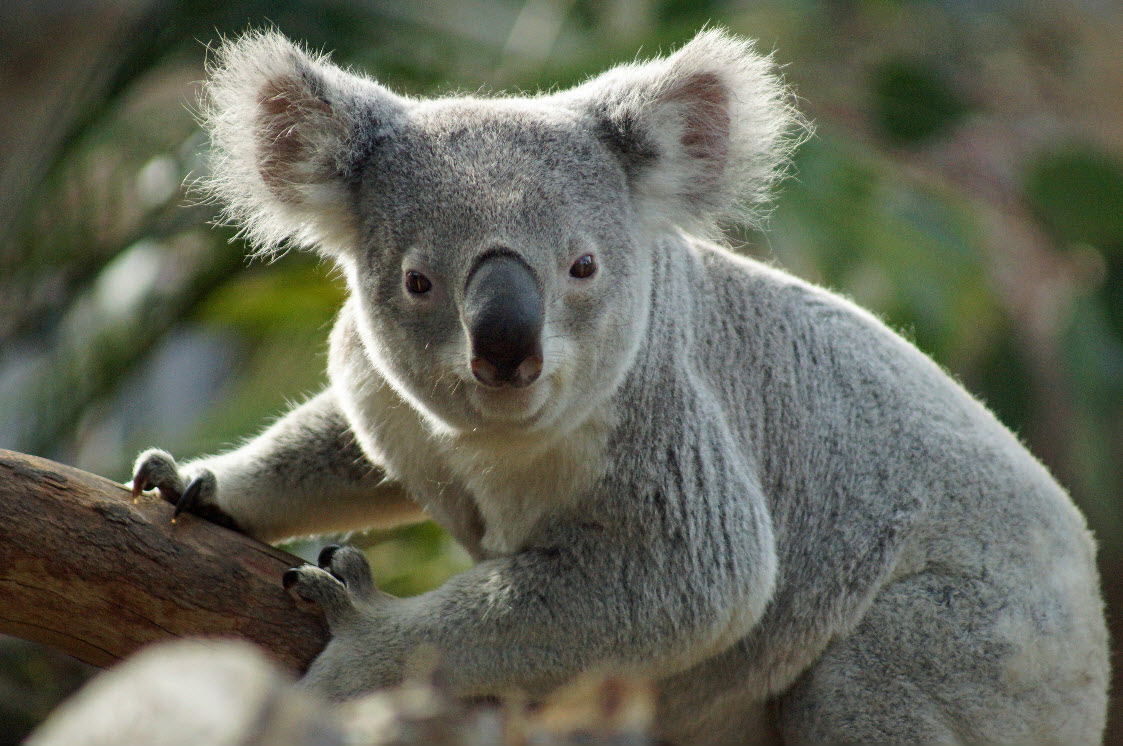

In [177]:
from PIL import Image
myKoala = Image.open("koala_pic.png")
myKoala

In [188]:
preprocess = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
myKoalaT = preprocess(myKoala)

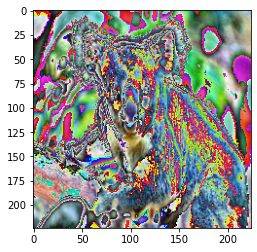

In [189]:
plt.imshow(transforms.ToPILImage()(myKoalaT))

In [190]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [192]:
outputK = model(myKoalaT.unsqueeze(0))

In [194]:
probs = torch.nn.Softmax()(outputK)

<ipython-input-194-f806dcce2144>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.Softmax()(outputK)


In [197]:
probs.shape

torch.Size([1, 1000])

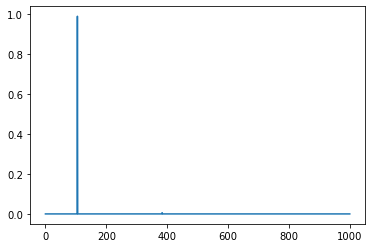

In [198]:
plt.plot(probs.detach().cpu()[0])

In [199]:
imagenet_labels[probs.argmax()]

'koala'

# Transfer learning 

In [59]:
preprocess = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

trainset = torchvision.datasets.CIFAR10(root=r"C:\Users\andre\OneDrive\Research2\data",
                                         train=True,
                                         download=False,
                                         transform = preprocess)

In [84]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 128)

In [85]:
images, labels = next(iter(trainloader))

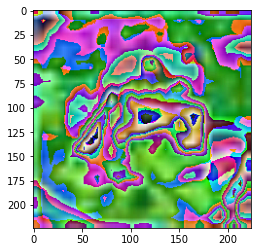

In [88]:
plt.imshow(transforms.ToPILImage()(images[0]))

In [91]:
output1layer = model.conv1(images[0].unsqueeze(0))

In [92]:
output1layer.shape

torch.Size([1, 64, 112, 112])

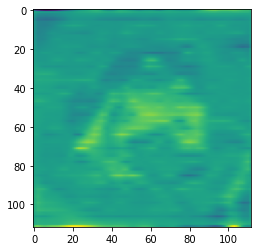

In [97]:
plt.imshow(output1layer[0, 10].detach())

In [104]:
# for chi in model.children():
#     if isinstance(chi, torch.nn.Sequential):
#         for chi2 in chi.children():
#             for chi3 in chi2.children():

                
            

In [106]:
for paramt in model.parameters():
    paramt.requires_grad= False

In [129]:
model.fc = torch.nn.Linear(512, 10)

In [130]:
loss_f = torch.nn.CrossEntropyLoss()

In [131]:
optimizer = torch.optim.Adam(model.parameters(), 1e-4)

In [132]:
Nepochs = 2
model.train()
for i in range(Nepochs):
    for j, batch in enumerate(trainloader):
        images, labes = batch
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_f(outputs, labels)
        loss.backward()
        optimizer.step()
        print(loss.item())

2.417393922805786
2.5453567504882812
2.4425745010375977
2.3828840255737305
2.3823564052581787
2.352334499359131
2.355844259262085
2.307281494140625


KeyboardInterrupt: 

In [ ]:
model.eval()
output = model(images)
